# Sailboat Mast Control

John Kohne, Shea Taggart, Audrey Vicino, Matthew Howenstine  
Final Project for CBE 30338, Spring 2017

---

**Table of Contents:**

[1.) Problem Statement](#section1)

[2.) Theoretical Development](#section2)

[3.) Results](#section3)

[4.) Executable Element](#section4)

[5.) Conclusions and Summary](#section5)

[6.) Appendices](#section6)

<a id='section1'></a>
## 1.) Problem Statement

### Problem

For a sailboat to optimize its arrival to a destination, it must continually modify the angle of its sails to the ever-changing wind direction. This is done to maximize the forward driving force of the sails. If the angle of the wind to the sail plane is more or less than the optimal angle, then the driving force of the sails is less than it can be to create optimal performance in fetching one’s destination. A well performing boat is one that can position its sails at the optimal angle to the wind for the highest percentage of sailing time.

Our design problem is to develop a sail trimming device and control system that will allow for the highest percentage of proper trim time as possible. A successful application would be one that could attain a sail plain to wind angle of between plus or minus 3 degrees of the ideal wind angle for over 85% of the time it was sailing, in average wind conditions.

The dynamics of motion of a sailboat in a sea are very complex. There are motions in three axis planes and various forces working in various directions as well. To simplify our approach, we will consider that the boat is moving in one direction and the wind can oscillate but the boat will be fixed in its motion to one plane. The sail angle to the wind can be changed but will it will only move parallel to the horizontal plain and the sail plain will only move about the vertical axis. The force of the wind’s interaction with the sail will be modeled as a function of the wind velocity and the angle of the sail plane relative to the wind. The drag of the wind on the sails will not be modeled to simplify the equations. The drag of the boat’s hull through the water will be modeled as a function of the velocity and the cross sectional area of the boat’s displacement path through the water. These modeled forces will be used to determine position, acceleration and velocity of the boat in its progress to a predetermined destination.

The boat, crew, and boom will be modeled with inertia and the velocity of the boat and boom used to determine their drag in movement.  Using the acceleration and velocity, the distance of the ship along its predetermined course will be calculated.  The use of a PID control system will drive the changes in the sail position which in turn would optimize the sail driving force and thus the velocity of the boat.  Performance will be judged on the basis of the shortest time taken to travel the specified course distance.
	


----

<a id='section2'></a>

## 2.) Theoretical Development


### Assumptions Made:

- 2-dimensional motion of a boat viewed from above

- Simplified by not including apparent wind due to the added complexity associated with it 

- The drag on the sail was not included in calculations 

- The boat maintained a bearing of 360/0 degrees throughout the simulation 

- The wind velocity was constant 

- A sine wave, step function, and combination were built into the model, but only the step function model was optimized as it best represented the dynamics of the boat and the control action was most apparent 

- Wind was varied between 290 and 300 degrees 

- Model is only applicable to upwind sailing (not accurate for downwind sailing as the equation would be for completely stalled hydrodynamics) 



### Variables:

$ t $ = time = seconds

$ F_{sail} $ = force of the sail (perpendicular to the boom) = lb-f

$ F_{drag,ship} $  = drag force of the movement of the boat through the water = lb-f

$ m $ = mass = lb = Boat Weight + Crew Weight = [1750 + 650 = 2400 ft]

$ x $ = position = ft

$ C_{d} $ = drag coefficient for the ship [.075]

$ \rho_{H_{2}O} $ = density of water = [62.43] lb/ft3

$ \rho_{air} $ = density of air = [0.074887] lb/ft3

$ V_{ship} $ = velocity of the ship through the water = ft/s

$ A_{ship} $ = cross sectional area of the boat underwater = ft/s^2

$\theta_w$ = Wind angle = true compass angle of the boom (pointing parallel to the boom towards the front of the boat) = degrees

$\theta_b$ = Boom angle = degrees

$\alpha$ = $\theta_b$-$\theta_w$ = degrees

SA = Surface area = ft^2

$V_w$ = Wind veloctiy = ft/s

$ \beta $ = drag coefficient for the turning movement of the boom = [50]

$ F_{B} $ = angular force of the boom = lb-f

$ I_{B} $ = angular moment of inertia of the boom = [100] lb ft^2

$ F_{drag,boom} $  = drag force of the angular movement of the boom = lbf

### Force on Sail:

$$F_s = SA * 6.28 (\alpha) \frac{\pi}{180}\frac{1}{2}\rho V^2$$

Explanation: This equation simulates the force generated by the movement of the wind past the curvature of the sail. The angle of the boom relative to the direction of the wind is an important component of the force that the sail is able to generate. The optimal relative angle is ten degrees based on the literature values. The model is built on the optimization of this angle so when the angle is not at its optimum value, the force falls off. Given the ten degree angle assumption, the force can be calculated from empirically derived constants that relate the force generated to the density and velocity squared of the air moving past the sail. Another important factor is the cross sectional area of the sail itself. This equation empirically expresses those relationships.  
- Example calulation:
   - SA = 117 $ft^2$, $ $ $V_w$ = 22 ft/sec, $ $ $\rho$ = 0.074887 lbm/ft3:
   - $\theta_b$ = 280, $\theta_w$ = 270
   - $F_s = 117*6.28*10*\frac{\pi}{180}\frac{1}{2}*0.074887*22^2 = 2324.05 lb_f$
  
Note: The force was made to exponential decay after passing 10 degrees off of the wind angle, with the force reaching aproxiamtely 0 at around 15 degrees. Here is the force profile vs the diffenrece between the wind and boom angle:

![](http://imgur.com/7mnVEsS.jpg)
    

### Driving Force:

$$F_{Dr} = SA * 6.28 (\alpha) \frac{\pi}{180}\frac{1}{2}\rho V^2 *cos(\theta_b - 270)$$

Explanation: Since the angle of the boom relative to the optimal angle of the boom is not always aligned, this equation relates the angle of the driving force from the sail to the direction of the movement of the ship. This is accomplished with the use of a cosine expression.  

- Example calulation:
    - $F_{Dr} = F_s*cos(280-270) = 2288.74 lb_f$


### Resulting Dynamics of Ship:

$$ m\frac{d^2x}{dt^2} = F_{sail} - F_{drag}$$

Explanation: This equation performs a similar function as the boom equation as the ship is given a mass and its drag. The dimensions of a ship called the J22 was used to determine the mass and sail areas that were used in these equations. This gave a realistic model to base our simulation off of. This equation gives a realistic boat model to use in the simulation, but does not directly affect the optimization aspects incorporated into the problem.

### Drag on Ship:

$$F_{drag} = C_{d} \rho_{H_{2}O}  V_{ship}^2  A_{ship}$$

Explanation: The drag equation simulates the characteristics of drag on a boat as it moves through the water. The references regarding the hydrodynamics show that the drag is related to a drag coefficient that relates the velocity and drag of the boat in the water, it is also related to the cross sectional area of the boat that is underwater in the direction of its movement. 	

### Boom Dynamics: 
$$F_{B} = I_{B} \frac{d^2 \phi_{B}}{dt^2} + \beta\frac{d\phi}{dt}$$

Explanation: This equation allows us to characterize a continuous movement of the boom over time by giving it a mass or moment so that when a force is applied to the boom its movement will demonstrate more realistic properties. Without inertial properties there would be no way to optimize this problem because the problem would solve itself ideally and instantaneously. By creating inertia in the boom, the PID controller has an optimization task in managing the inertia of the boom in relation to the angle of the wind. The force of the boom included an electronic signal limiter to prevent the boom from swinging wildy at unrealistic speeds to correct the error in the system. The maximum force the output allowed was changed to keep the maximum boom velocity under around 6 degrees per second 

### Derivative Rules for Finite Differences

Where h = dt = t(i) - t(i-1)

$$ \frac{dy}{dt} = \frac{y(i)-y(i-1)}{h} $$

$$ \frac{d^2y}{dt^2} =  \frac{y(i)-2y(i-1)+y(i-2)}{h^2} $$

Explanation: Whenever a differential equation was utilized in the model, it was turned into a fixed step, finite difference approximation. In each case, y(i) was able to be solved for.


### Controller

PID Controller:

$$ u(t) = K_p*e(t)+\frac{K_p}{T_i}\int^t_0 e(t)d\tau+ K_p*T_d\frac{d}{dt}e(t)$$

Discretized PID (with step size h):

First, take finite difference derivative of both sides:

$$ \frac{u(i) - u(i-1)}{h} = K_p \left[  \frac{e(i)-e(i-1)}{h}+\frac{1}{T_i}e(i)+T_d\frac{[e(i)-2e(i-1)+e(i-2)]}{h^2}\right] $$

Solve for u(i):

$$ u(i) = u(i-1)+K_p [e(i)-e(i-1)]+\frac{K_p*h}{T_i}e(i) + \frac{K_pT_d}{h}[e(i)-2e(i-1)+e(i-2)] $$

----

<a id='section3'></a>

## 3.) Results

### General Results of Code:

In the "SIMULATION SETUP" part of the code, the user can specify number of runs (parameter sets to test), the values of these parameters in each case (Kp, TauI, and TauD lists all have to be N(Runs) long for code to work). The wind type can be used to specify three different wind conditions: step function of 10º every 100 seconds, sinusoidal wave with amplitude of 10º, and a combination of the two types with a unit step occuring once in each 500 second interval. For all modeling optimaztion purposes below, the first type (simple step function) was used to fully capture the response behavior to the disturbance (wind direction). 

The graphs that are outputted are (1) the boom angle and wind angle as a function of time, (2) the error in the optimal boom angle as a function of time, (3) the force on the sail, (4) the force in the direction of sailing, (5) the boom angle response to a single step, (6) the angular velocity and acceration of the boom as a result of the PID controller being fed into a digital-signal-to-force conversion motor mechanism, (7) the ship velocity, (8) the ship's position, and if two of the PID parameters are held constant while the other one changes, (9) a graph of the time it took the ship to reach 15k feet vs the changing parameter.

For proportional control only (TauI = 1E7, TauD = 0.0), with the following values for each run:

| Run| Kp | Time until 15k feet|
|:-:|:-:|:-:|
| 1| 0.1| 1658.96589659 s| 
| 2| 1.0| 1566.55665567 s| 
| 3| 2.0 | 1553.35533553 s| 

Note: the way to run this simulation would be to set Runs=3, and then:

    Kp =[0.5,1.0,2.0]
    TauI =[1E7]*Runs
    TauD =[0.]*Runs]

The following graphs give a sample of the most relevent data outputed by a run of the program:

![](http://imgur.com/lpzmbeI.jpg)

![](http://imgur.com/9NZaOvs.jpg)


### Optimized PID Controller:

To obtain a highly optimized system, parameters were first guessed and then improved upon to minimize time until the 15k feet target was achieved. The initial starting point was visually obtained by varying parameters until a value that had slight overshoot and fast respose was obtained. This intial guess for Kp, $\tau_i$, and $\tau_d$ was:

| Kp|$\tau_i$ |$\tau_d$ | Time until 15k feet|
|:-:|:-:|:-:|:-:|
| 5| 100.0|0.5| 1551.35513551 s| 

![](http://imgur.com/MilNqc7.jpg)

While keeping $\tau_i$ and $\tau_d$ constant at 100.0 and 0.5 respectively, various values of Kp were tested and then plotted vs the time it took for the ship to reach 15k feet. The following plot was obtained:

![](http://imgur.com/UKo6Djq.jpg)

A value of 15.0 was chosen for an ideal value due to it lying on the tail end of the exponentially decaying plot, where a little change in Kp resulted in a small change in the time required. At the higher values, the time decreased, but overshoot increased. A value of 15.0 was chosen as a balance between these two competing conditions.

With Kp set to 15.0, $\tau_d$ was held at 0.5 and various $\tau_i$ were used to obtain time values and then plotted:

![](http://imgur.com/mJhky0S.jpg) 

Following a similar pattern with Kp, a value of 700 was chosen for $\tau_i$ due to it's leveling-off behavior as it increased, as well as the previously mentioned factors. (Note, while the graph appears to half a solution on the left side as well due to the slope down, it didn't reach a stable solution on the other side comprable to the solutions with increasing $\tau_i$) Finally, keeping Kp at the chosen 15.0 and $\tau_i$ at the chosen 700.0, a range of values of $\tau_d$ were utilized and graphed:

![](http://imgur.com/rBPRHgL.jpg)

Unlike the other two parameters, there was an trend to be followed to properly optimize $\tau_d$, as it's graph included a definitive valley. With $\tau_d$ < 0.75, the system experienced too much overshoot, which negatively affected the performance of the sail. With $\tau_d$ > .85, the system was too slow to properly respond to changes compared to the center of the valley. As such, a middling value of 0.8 was chosen for $\tau_d$.

Running a simulation of the resulting controller resulted in the following values:

| Kp|$\tau_i$ |$\tau_d$ | Time until 15k feet|
|:-:|:-:|:-:|:-:|
|15.0| 700.0|0.8| 1517.95179518 s| 

![](http://imgur.com/rhHIbb9.jpg)

With a smaller overshoot than the original starting point parameters (~.5 instead of ~ 2.0), and with a quicker response, this system reached the destination a full 33.4 seconds sooner, despite having similar parameters and similar appearances at first in terms of response. In a tight boat race, this 33.4 seconds could become an important deciding factor. 

<a id='section4'></a>

## 4.) Executable Element: Code

By default, the code will utilize the following parameter sets (Runs=3) outlining various differnt types of response:

    Kp =[0.5,1.5,15.0]
    TauI =[1E7,100,700]
    TauD =[0.0,.5,.8]
    
System 1 corresponds to an overdamped proportional control only system, System 2 corresponds to an unoptimized PID response, and System 3 is the optimized values from the above section.

Note: the following are the most productive ways to set values for the three parameters

   - All runs = same value:
            Parameter = [X.X] * Runs
   - All runs = different values:
            Parameter = [X.X, Y.Y, Z.Z, ...]
   - Linearly spaced values:
            Parameter = np.linspace(X.X, Z.Z, Runs)
   

In [536]:
# Import neccessary modules

%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import control.matlab as control

# Define a degrees to radians function
def DegtoRad(angle):
    return angle*2*np.pi/360.

# The javascript below is to resize window to fit all charts from simulation

In [537]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

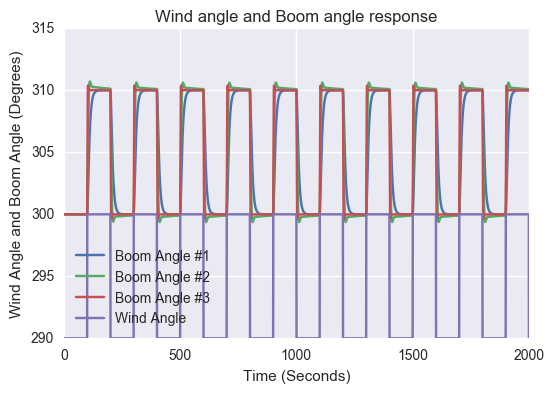

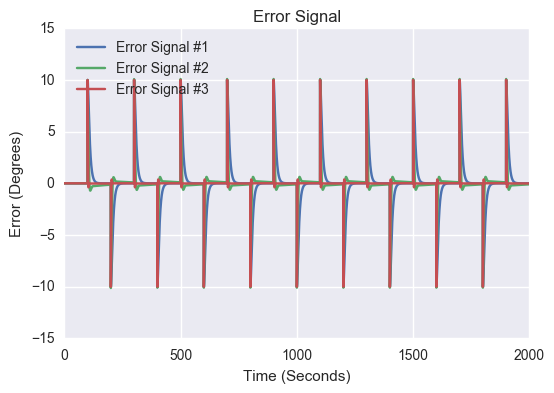

Average Force #1: 1964.1095763
Average Force #2: 2032.06516162
Average Force #3: 2264.64748194


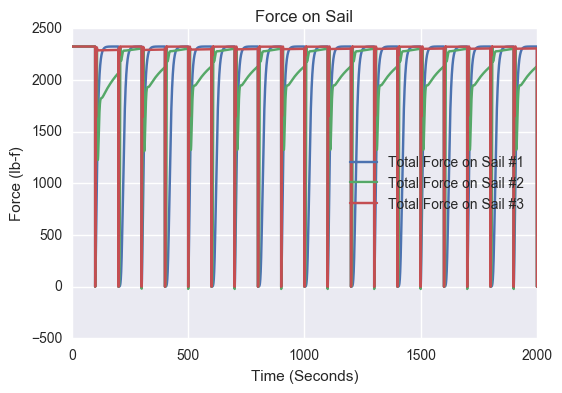

Average Force in Direction #1: 1600.62631774
Average Force in Direction #2: 1665.15183657
Average Force in Direction #3: 1848.73864241


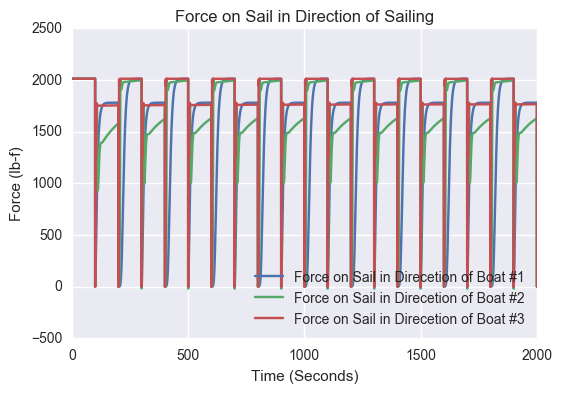

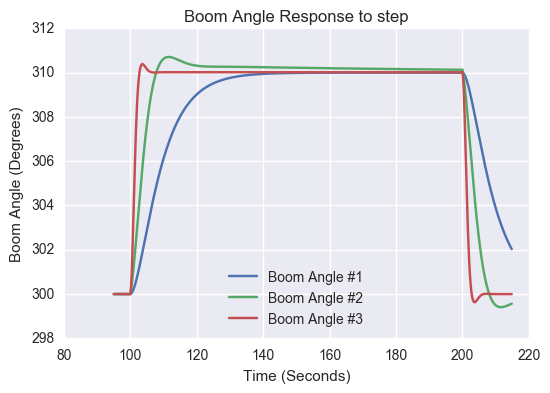

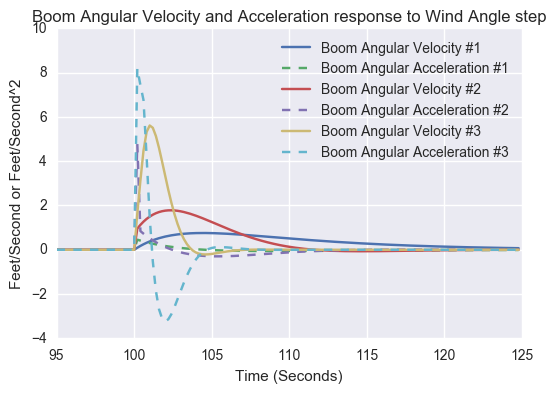

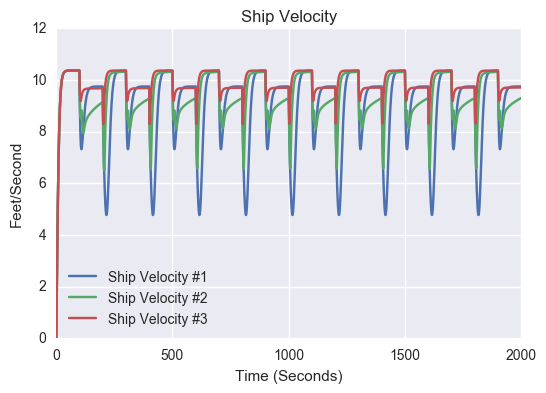

Time for Ship #1 to reach 15k ft: 1658.96589659
Time for Ship #2 to reach 15k ft: 1607.16071607
Time for Ship #3 to reach 15k ft: 1517.95179518


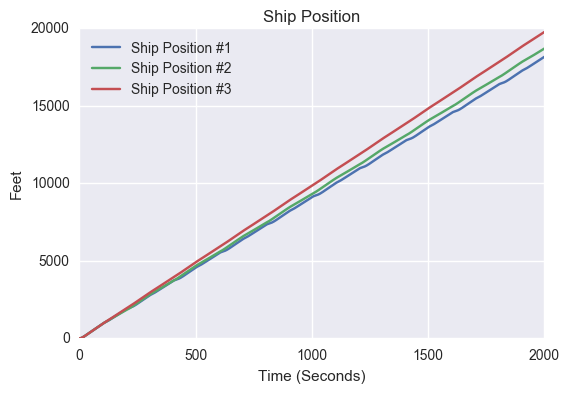

In [715]:
###################################################
# SIMULATION SETUP:

# Define changable controller parameteres 
# IF ArmControl = 0:
#     Valid: Kp < 1.0
#     Suggested example for well controlled system: Kp = .2, TauI = 50., TauD = .1
#     Suggested example for overdamped system with proptional only control: Kp = .2, TauI = 1E5., TauD = 0
#     Suggested example for underdamped system with proptional only control: Kp = 1.4, TauI = 1E5., TauD = 0
# IF ArmControl = 1:
#     Suggested example for well controlled system: Kp = 2., TauI = 100., TauD = .5 (w/slight overshoot)
#     Suggested example for overdamped system with proptional only control: Kp = .3, TauI = 1E5., TauD = 0
#     Suggested example for underdamped system with proptional only control: Kp = 3., TauI = 1E5., TauD = 0

Runs = int(3) #number of values in each list for Kp, TauI, TauD 
#(Be sure to fill each of the vectors below with the appropriate number of values)

Kp =[0.5,1.5,15.0]
TauI =[1E7,100,700]
TauD =[0.0,.5,.8]

# Wind type (1=step wave, 2=sin wave, 3=combination sin wave and step (4:1 ratio))
WindType = 1

###################################################
# SIMULLATION:

# Simulation setup
points = 10000 # number of steps
timeBound = 2000 # largest time 
t = np.linspace(0,timeBound,points) # create time vector
dt = t[1]-t[0]
thetaW = [None]*points # wind angle

# Create empty lists to hold values
thetaB = [None]*Runs # boom angle
thetaBideal = [None]*Runs #ideal boom angle
Error = [None]*Runs # error
p = [None]*Runs # controller response

Force = [None]*Runs # Force on sail
ForceDr = [None]*Runs # directional force on sail

thetaF = [None]*Runs # Boom Force
thetaV = [None]*Runs # Boom Angular Velocity
thetaA = [None]*Runs # Boom acceleration

shipV = [None]*Runs # ship veloctiy
shipA = [None]*Runs # ship acceleration
shipX = [None]*Runs # ship position

time15k = [None]*Runs # time until ship reaches 15,000 ft travelled

# Finalize the initiation of the multi-dimensional arrays to hold the values for each run
for k in range(Runs):
    thetaB[k] = [None]*points 
    thetaBideal[k] = [None]*points 
    Error[k] = [None]*points 
    p[k] = [None]*points 
    Force[k] = [None]*points
    ForceDr[k] = [None]*points 
    thetaF[k] = [None]*points 
    thetaV[k] = [None]*points 
    thetaA[k] = [None]*points 
    shipV[k] = [None]*points
    shipA[k] = [None]*points
    shipX[k] = [None]*points

# Develop step in wind
if (WindType==1):
    for i,j in enumerate(t):
        if j%200 > 100:
            thetaW[i] = 300.
        else: 
            thetaW[i] = 290.
            
elif (WindType==2):
     for i,j in enumerate(t):
            thetaW[i] = 10*np.sin(j/(20*np.pi))+290

elif (WindType==3):
    for i,j in enumerate(t):
        if j%500 > 400:
            thetaW[i] = 300.
        else: 
            thetaW[i] = 10*np.sin(j*np.pi/(250))+290
        
# Properties (for a J-22)
SA = 117. # ft^2 
Weight = 1750. # lbs
Crew = 650. # lbs
rho = 0.074887 # lbm/ft3, air density
Vw = 22. # ft/sec wind speed
Cd = 0.075
rhoW = 62.43 # lb/ft3, water density
shipArea = 4 # ft2

# Boom Arm Proprties
Ib = 100# lb m - moment
KthetaB = 10 # proportional response to controller electronic signal
Beta = 50 # Drag of the boom

ArmControl =1 # 0 ignores boom properties, 1 includes physical boom properties
ForceLimit =1 # 0 ignores boom force limiter

# Calculate rough estimate of step two with proportional control only
# Set up allows use of t[i-2] in derivative controller in main loop
for k in range(Runs):
    # Set up initial values
    thetaB[k][0] = 300.
    thetaBideal[k][0] = thetaW[0]+10.
    p[k][0]=0
    Error[k][0]=thetaBideal[k][0]-thetaB[k][0]
    p[k][0]=Kp[k]*Error[k][0]
    thetaBideal[k][1] = thetaW[0]+10
    Error[k][1]=thetaBideal[k][0]-thetaB[k][0]
    p[k][1]=Kp[k]*(Error[k][1]-Error[k][0])
    thetaB[k][1] = thetaB[k][0]+p[k][1]
    
    shipX[k][0],shipX[k][1]=0.0,0.0
    shipV[k][0],shipV[k][1]=0.0,0.0
    shipA[k][0],shipA[k][1]=0.0,0.0
    
# Process loop - discrete steps

for k in range(Runs):
    for i,j in enumerate(t):
        if i>1:
            Error[k][i]=(thetaBideal[k][i-1]-thetaB[k][i-1]) # New Error
            PIDdelta1 = Kp[k]*(Error[k][i]-Error[k][i-1]) # Proportional Control
            PIDdelta2 = Kp[k]*dt/(TauI[k])*Error[k][i] # Integral Control
            PIDdelta3 = Kp[k]*TauD[k]/dt*((Error[k][i]-2*Error[k][i-1]+Error[k][i-2])) # Derivative Control
        
            PIDdelta = PIDdelta1+PIDdelta2+PIDdelta3 # Full Controller 

        
            p[k][i]=p[k][i-1]+PIDdelta # New response
        
            if ArmControl==1:
                thetaF[k][i] = (p[k][i])*KthetaB
                if ForceLimit==1:
                    if (thetaF[k][i]>180/dt):
                        thetaF[k][i]=180/dt
                    elif (thetaF[k][i]<-180/dt):
                        thetaF[k][i]=-180/dt
                RightNumArm = thetaF[k][i]+ (Ib/(dt**2)*(2.*thetaB[k][i-1]-thetaB[k][i-2]))+ (Beta*thetaB[k][i-1]/dt)
                Arm = RightNumArm /((Ib/dt**2)+(Beta/dt))
                thetaB[k][i] = Arm
            else:
                thetaB[k][i] = thetaB[k][i-1]+p[k][i]

            thetaV[k][i] = (thetaB[k][i]-thetaB[k][i-1])/dt
            thetaA[k][i] = (thetaB[k][i]-2.*thetaB[k][i-1]+thetaB[k][i-2])/(dt**2.)
        
            thetaBideal[k][i]=thetaW[i]+10. # New ideal angle
        
            VApp = Vw #- shipV[k][i-1]
            # Force Equations:
            if (((thetaB[k][i]-thetaW[i])<=10.) and ((thetaB[k][i]-thetaW[i])>=-10.)):
                Force[k][i] = SA*6.28*(thetaB[k][i]-thetaW[i])*np.pi/180/2*rho*VApp**2 # Overall force
                ForceDr[k][i] = Force[k][i]*np.cos(DegtoRad(thetaB[k][i]-(270.))) # Directional force
            elif ((thetaB[k][i]-thetaW[i])>10.): 
                Force[k][i] = SA*6.28*(thetaB[k][i]-thetaW[i])*np.pi/180/2*rho*VApp**2*(np.exp(-(thetaB[k][i]-thetaW[i]-10)))# Overall force
                ForceDr[k][i] =  Force[k][i]*np.cos(DegtoRad(thetaB[k][i]-(270.)))
            elif ((thetaB[k][i]-thetaW[i])<-10.): 
                Force[k][i] = SA*6.28*(thetaB[k][i]-thetaW[i])*np.pi/180/2*rho*VApp**2*(np.exp((thetaB[k][i]-thetaW[i]+10)))# Overall force
                ForceDr[k][i] =  Force[k][i]*np.cos(DegtoRad(thetaB[k][i]-(270.)))
                
            FD = Cd*rhoW*shipArea*shipV[k][i-1]**2
            shipF = ForceDr[k][i]-FD
            shipA[k][i] = shipF/(Weight+Crew)
            shipV[k][i] = shipA[k][i-1]*dt+shipV[k][i-1]
            shipX[k][i] = shipV[k][i-1]*dt+shipX[k][i-1]
            
            if (shipX[k][i] > 15000)and(time15k[k]==None):
                time15k[k]=j
                

#######################################
# PLOTTING RESULTS

for k in range(Runs):
    plt.plot(t,thetaB[k],label="Boom Angle #%d" % (k+1))
plt.plot(t,thetaW, label = "Wind Angle")
plt.legend(loc=0)
plt.title("Wind angle and Boom angle response")
plt.xlabel('Time (Seconds)')
plt.ylabel('Wind Angle and Boom Angle (Degrees)')
plt.show()

for k in range(Runs):
    plt.plot(t,Error[k],label="Error Signal #%d" % (k+1))
plt.legend(loc=0)
plt.title("Error Signal")
plt.xlabel('Time (Seconds)')
plt.ylabel('Error (Degrees)')
plt.show()

if (Runs>1):
    for k in range(Runs):
        plt.plot(t,Force[k],label ="Total Force on Sail #%d" % (k+1))
        print(("Average Force #%d: " + str(np.average(Force[k][2:points]))) % (k+1))
    plt.legend(loc=0)
    plt.title("Force on Sail")
    plt.xlabel('Time (Seconds)')
    plt.ylabel('Force (lb-f)')
    plt.show()
    for k in range(Runs):
        plt.plot(t,ForceDr[k], label="Force on Sail in Direcetion of Boat #%d" % (k+1))
        print(("Average Force in Direction #%d: " + str(np.average(ForceDr[k][2:points]))) % (k+1))
    plt.legend(loc=0)
    plt.title("Force on Sail in Direction of Sailing")
    plt.xlabel('Time (Seconds)')
    plt.ylabel('Force (lb-f)')
    plt.show()
else:
    for k in range(Runs):
        plt.plot(t,Force[k],label ="Total Force on Sail #%d" % (k+1))
        plt.plot(t,ForceDr[k], label="Force on Sail in Direcetion of Boat #%d" % (k+1))
        print(("Average Force #%d: " + str(np.average(Force[k][2:points]))) % (k+1))
        print(("Average Force in Direction #%d: " + str(np.average(ForceDr[k][2:points]))) % (k+1))
    plt.legend(loc=0)
    plt.title("Force on Sail")
    plt.xlabel('Time (Seconds)')
    plt.ylabel('Force (lb-f)')
    plt.show()

if WindType == 3:
    for k in range(Runs):
        plt.plot(t[int(395./2000.*points):int(515./2000.*points)],thetaB[k][int(395./2000.*points):int(515./2000.*points)],label="Boom Angle #%d" % (k+1))
    plt.legend(loc=0)
    plt.title("Boom Angle Response to step")
    plt.xlabel('Time (Seconds)')
    plt.ylabel('Boom Angle (Degrees)')
else:
    for k in range(Runs):
        plt.plot(t[int(95./2000.*points):int(215./2000.*points)],thetaB[k][int(95./2000.*points):int(215./2000.*points)],label="Boom Angle #%d" % (k+1))
    plt.legend(loc=0)
    plt.title("Boom Angle Response to step")
    plt.xlabel('Time (Seconds)')
    plt.ylabel('Boom Angle (Degrees)')
plt.show()

if WindType == 3:
    for k in range(Runs):
        plt.plot(t[int(395./2000.*points):int(425./2000.*points)],thetaV[k][int(395./2000.*points):int(425./2000.*points)],label="Boom Angular Velocity #%d" % (k+1))
        plt.plot(t[int(395./2000.*points):int(425./2000.*points)],thetaA[k][int(395./2000.*points):int(425./2000.*points)],'--',label="Boom Angular Acceleration #%d" % (k+1))
    plt.legend(loc=0)
    plt.title("Boom Angular Velocity and Acceleration response to Wind Angle step")
    plt.xlabel('Time (Seconds)')
    plt.ylabel('Feet/Second or Feet/Second^2')
else:
    for k in range(Runs):
        plt.plot(t[int(95./2000.*points):int(125./2000.*points)],thetaV[k][int(95./2000.*points):int(125./2000.*points)],label="Boom Angular Velocity #%d" % (k+1))
        plt.plot(t[int(95./2000.*points):int(125./2000.*points)],thetaA[k][int(95./2000.*points):int(125./2000.*points)],'--',label="Boom Angular Acceleration #%d" % (k+1))
    plt.legend(loc=0)
    plt.title("Boom Angular Velocity and Acceleration response to Wind Angle step")
    plt.xlabel('Time (Seconds)')
    plt.ylabel('Feet/Second or Feet/Second^2')
plt.show()

for k in range(Runs):
    plt.plot(t,shipV[k],label="Ship Velocity #%d" % (k+1))
plt.legend(loc=0)
plt.title("Ship Velocity")
plt.xlabel('Time (Seconds)')
plt.ylabel('Feet/Second')
plt.show()

for k in range(Runs):
    plt.plot(t,shipX[k],label="Ship Position #%d" % (k+1))
    print(("Time for Ship #%d to reach 15k ft: " + str(time15k[k])) % (k+1))
plt.legend(loc=0)
plt.title("Ship Position")
plt.xlabel('Time (Seconds)')
plt.ylabel('Feet')
plt.show()

# Checks to see if only one of the parameters was changed over the runs, 
# and plots the relative performance at the benchmarks set by the 
# other two unchanging parameters
if Runs > 2:
    if all(x==TauD[0] for x in TauD)and(all(x==TauI[0] for x in TauI)):
        plt.plot(Kp,time15k)
        plt.title("Time to Reach 15k vs Kp")
        plt.xlabel('Kp')
        plt.ylabel('Time to 15k ft')
        plt.show()
    elif all(x==Kp[0] for x in Kp)and(all(x==TauD[0] for x in TauD)):
        plt.plot(TauI,time15k)
        plt.title("Time to Reach 15k vs TauI")
        plt.xlabel('TauI')
        plt.ylabel('Time to 15k ft')
        plt.show()
    elif all(x==Kp[0] for x in Kp)and(all(x==TauI[0] for x in TauI)):
        plt.plot(TauD,time15k)
        plt.title("Time to Reach 15k vs TauD")
        plt.xlabel('TauD')
        plt.ylabel('Time to 15k ft')
        plt.show()

<a id='section5'></a>

## 5.) Conclusions and Summary: 

A current model of a sailing vessel was simulated as the core of this project. The primary simulation was based on the aerodynamics of a sail in a fixed wind velocity condition. The objective of the simulation was to optimize the course made good over a specified distance of a vessel in a step based varying wind velocity profile. This objective was met by controlling the movement of the sail, with a desire to move it to an optimal position relative to the wind. This would produce the greatest driving force for the movement of the boat through the specified course. The model used a PID controller to control the movements of the sail relative to the changing wind. An optimization of the PID controller parameters was tested against performance to time traveled over the fixed course. These values were determined using optimization techniques and presented.  With the use of optimized PID parameters, the performance of the sailboat improved 33.4 seconds over a best guess method using our empiric familiarity with the workings of the program.  This difference might at first seem small but is quite substantial in racing venues.

Although many simplifying assumptions were made in the creation of this model and PID control mechanism used, the equations used replicated true boat behavior fairly accurately.  There is much room for the future development of the model and learning that can come from it.  Further testing with different wind model patterns will also be interesting.



-------

<a id='section6'></a>
## 6.) Appendices. 


**References**

Sailing Aerodynamics. John Morwood, Philosophical Library, New York, 1954.

Design and Implementation of a Control System for a Sailboat.  Robotics 2016, 5,5,DOI: 10, 3390/Roboticcs5010005

Modeling and Control Design of a Robotic Sailboat.  www.researchgate.net/publication/256444622

What exactly is the lift of a sailboat as explained by Bernoulli’s principle?  http://phtsics.stackexchange.com/questions/83639